In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
dataset = pd.read_csv("Mall_customers.csv")

In [27]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
X = dataset.iloc[:,3:].values

In [30]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

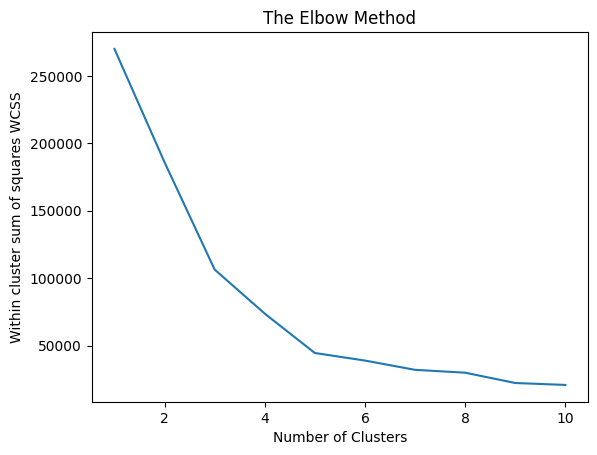

In [31]:
#Elbow method - with in cluster sum of squares
from sklearn.cluster import KMeans
wcss = [] # with in clusters sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1,11),wcss)    
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within cluster sum of squares WCSS")
plt.show()


In [32]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [33]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

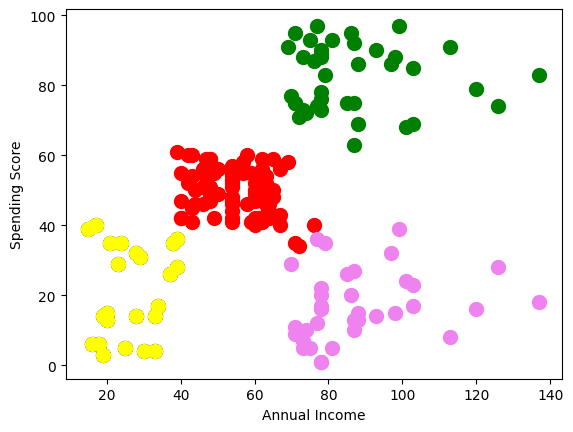

In [34]:
plt.scatter(X[y_kmeans==0 , 0], X[y_kmeans==0 , 1], s = 100, c='red',   label='Cluster 1')
plt.scatter(X[y_kmeans==1 , 0], X[y_kmeans==1 , 1], s = 100, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans==2 , 0], X[y_kmeans==2 , 1], s = 100, c='violet', label='Cluster 3')
plt.scatter(X[y_kmeans==3 , 0], X[y_kmeans==3 , 1], s = 100, c='black', label='Cluster 4')
plt.scatter(X[y_kmeans==3 , 0], X[y_kmeans==3 , 1], s = 100, c='yellow', label='Cluster 5')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


In [35]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score
sil_score = silhouette_score(X, y_kmeans)

print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.553931997444648


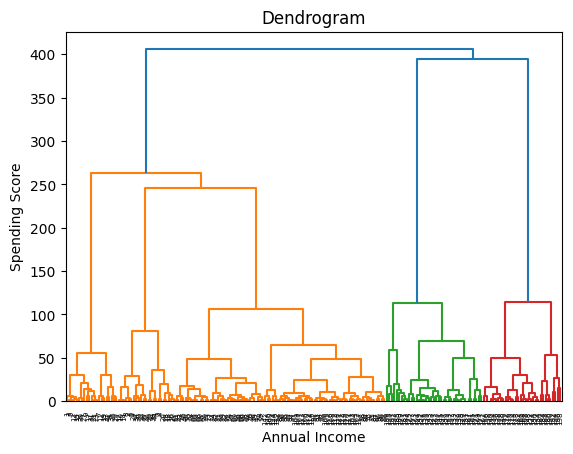

In [36]:
import scipy.cluster.hierarchy as sch
# Create the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Plot the dendrogram
plt.title('Dendrogram')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()